In [1]:
# K-means
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
import joblib
from joblib import dump, load

In [2]:
repository = pd.read_csv('list_with_audio_features.csv')

In [3]:
repository.head()

,Unnamed: 0,artist,song,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,pink floyd,another brick in the wall (part 2),spotify:track:1xUTI8Ce8IQnyYCGPmrbzS,0.395,0.766,0,-11.041,1,0.0512,0.00583,0.006240,0.7740,0.611,105.410,326373,4
1,1,barbra streisand,a woman in love,spotify:track:53No4na49hTw82MxrFh2PB,0.489,0.245,3,-16.876,0,0.0284,0.43000,0.000015,0.2980,0.333,169.747,230227,4
2,2,john lennon,(just like) starting over,spotify:track:5y0YreEOnQiKFAnCrcFIXz,0.701,0.790,9,-6.160,1,0.0725,0.30100,0.000061,0.1790,0.421,99.104,236547,4
3,3,diana ross,upside down,spotify:track:3pbtBomO4Zt5gGiqsYeiBH,0.873,0.855,5,-8.559,0,0.0615,0.17900,0.028500,0.0377,0.884,107.868,245600,4
4,4,lipps inc,funkytown,spotify:track:5dIKF6uVJ206hj0pO0gg0I,0.893,0.509,0,-10.136,1,0.0659,0.00154,0.515000,0.0783,0.334,122.478,469347,4


In [4]:
repository.shape

(1756, 17)

In [5]:
repository=repository.drop(['Unnamed: 0'], axis=1)
X=repository.copy()

In [6]:
X=repository.drop(['artist', 'song', 'uri'], axis=1)

In [7]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.395,0.766,0,-11.041,1,0.0512,0.00583,0.006240,0.7740,0.611,105.410,326373,4
1,0.489,0.245,3,-16.876,0,0.0284,0.43000,0.000015,0.2980,0.333,169.747,230227,4
2,0.701,0.790,9,-6.160,1,0.0725,0.30100,0.000061,0.1790,0.421,99.104,236547,4
3,0.873,0.855,5,-8.559,0,0.0615,0.17900,0.028500,0.0377,0.884,107.868,245600,4
4,0.893,0.509,0,-10.136,1,0.0659,0.00154,0.515000,0.0783,0.334,122.478,469347,4


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)
X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

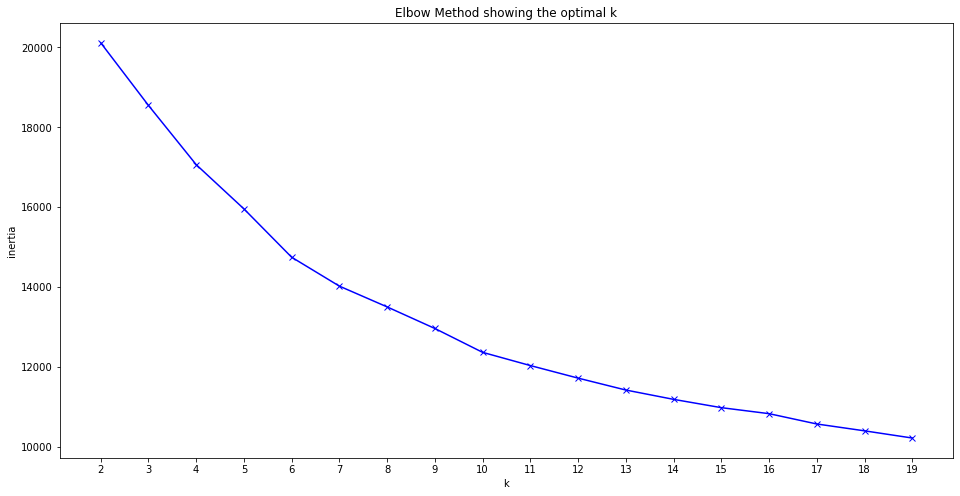

In [9]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

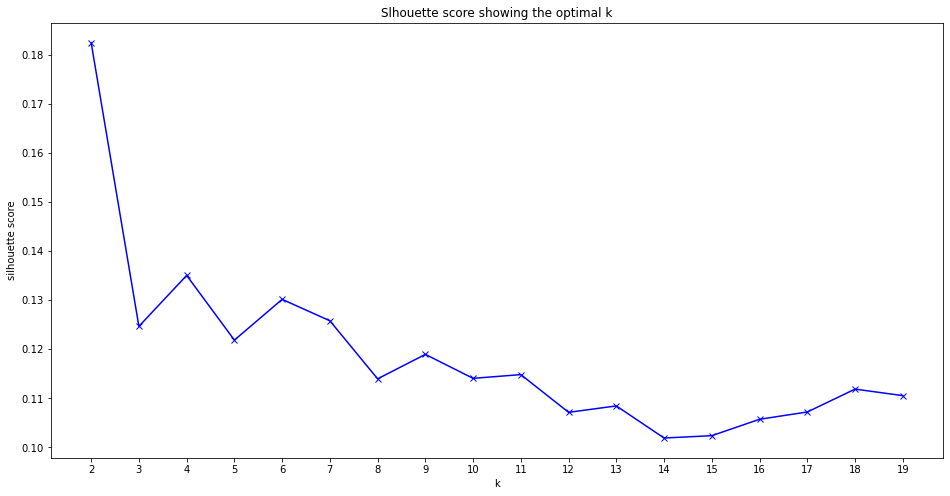

In [10]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [10]:
# According to graphs, 6 clusters may be the optimal number
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=1234)

In [11]:
X_scaled.shape

(1756, 13)

In [12]:
joblib.dump(scaler, 'scaler.bin')

['scaler.bin']

In [13]:
dump(kmeans, 'kmeans.bin')

['kmeans.bin']

In [14]:
clusters = kmeans.predict(X_scaled)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     79
1    652
2    290
3    326
4     29
5    380
dtype: int64

In [15]:
kmeans.inertia_ 

14746.536536832296

In [16]:
# adding information of clusters to repository
repository['cluster']=clusters

In [16]:
# Testing agglomerative clustering

In [17]:
from sklearn import cluster

In [18]:
# I am not sure if this is the best method of aggregation. The other methods return clusters with big differences 
# between them (some clusters with most of the elements inside, while other clusters are almost empty)  
agglomerative = cluster.AgglomerativeClustering(n_clusters=6,linkage='ward')
pred = agglomerative.fit_predict(X)

In [19]:
# aggregates almost all elements in 1 cluster
agglomerative = cluster.AgglomerativeClustering(n_clusters=6,linkage='complete')
pred = agglomerative.fit_predict(X)

In [20]:
# aggregates almost all elements in 1 cluster
agglomerative = cluster.AgglomerativeClustering(n_clusters=6,linkage='average')
pred = agglomerative.fit_predict(X)

In [22]:
X['cluster2']=pred

In [23]:
X['cluster2'].value_counts()

0    1680
1      64
2       9
3       1
5       1
4       1
Name: cluster2, dtype: int64

In [24]:
# I don't know if agglomerative clustering is better than KMeans clustering. I'm going to use this last method for clustering.

In [17]:
repository.to_csv('list_with_clusters.csv', index=False)

In [18]:
repository.to_excel('list_with_clusters.xls')

C:\Users\Usuario\AppData\Local\Temp/ipykernel_6752/464492750.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  repository.to_excel('list_with_clusters.xls')
